In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13375 entries, 0 to 13374
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               13375 non-null  int64  
 1   index            13375 non-null  int64  
 2   Name             13373 non-null  object 
 3   Platform         13375 non-null  object 
 4   Year_of_Release  13150 non-null  float64
 5   Genre            13373 non-null  object 
 6   Publisher        13328 non-null  object 
 7   NA_Sales         13375 non-null  float64
 8   EU_Sales         13375 non-null  float64
 9   JP_Sales         13375 non-null  float64
 10  Other_Sales      13375 non-null  float64
 11  Global_Sales     13375 non-null  float64
 12  Critic_Score     6505 non-null   float64
 13  Critic_Count     6505 non-null   float64
 14  User_Score       8007 non-null   object 
 15  User_Count       6039 non-null   float64
 16  Developer        8067 non-null   object 
 17  Rating      

In [4]:
#EDA 

<AxesSubplot:>

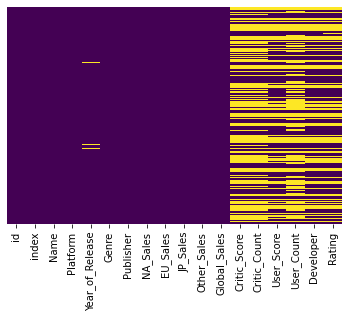

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [6]:
train.isna().sum()

id                    0
index                 0
Name                  2
Platform              0
Year_of_Release     225
Genre                 2
Publisher            47
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       6870
Critic_Count       6870
User_Score         5368
User_Count         7336
Developer          5308
Rating             5431
dtype: int64

In [7]:
train.columns

Index(['id', 'index', 'Name', 'Platform', 'Year_of_Release', 'Genre',
       'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [8]:
csq=chi2_contingency(pd.crosstab(train['Name'], train['Global_Sales']))
print("P-value: ",csq[1])

P-value:  1.0


In [9]:
csq=chi2_contingency(pd.crosstab(train['Platform'], train['Global_Sales']))
print("P-value: ",csq[1])

P-value:  2.4217104612431936e-130


In [10]:
csq=chi2_contingency(pd.crosstab(train['Genre'], train['Global_Sales']))
print("P-value: ",csq[1])

P-value:  1.2273677393779472e-07


In [11]:
csq=chi2_contingency(pd.crosstab(train['Publisher'], train['Global_Sales']))
print("P-value: ",csq[1])

P-value:  1.0


In [12]:
train= train.drop(['index','Critic_Score', 'Critic_Count', 'User_Score','User_Count', 'Developer', 'Rating','Publisher','Name','Year_of_Release','Genre','id','Platform'],axis=1)

In [13]:
test= test.drop(['Critic_Score', 'Critic_Count', 'User_Score','User_Count', 'Developer', 'Rating','Publisher','Name','Year_of_Release','Genre','id','Platform'],axis=1)

In [14]:
test.columns

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], dtype='object')

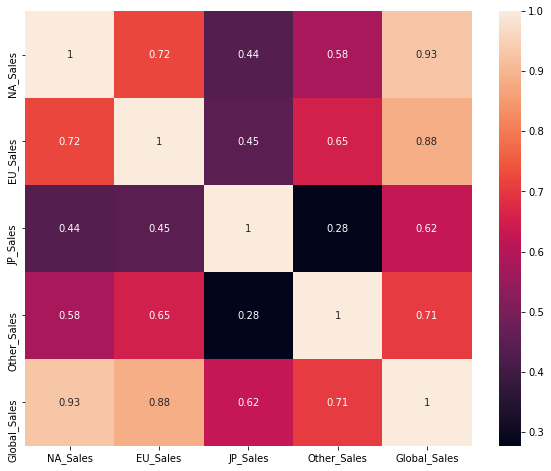

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),annot=True)
plt.show()

In [16]:
# train.Genre.fillna(train.Genre.mode()[0], inplace = True)

In [17]:
train.isna().sum()

NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [18]:
train.columns

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], dtype='object')

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13375 entries, 0 to 13374
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NA_Sales      13375 non-null  float64
 1   EU_Sales      13375 non-null  float64
 2   JP_Sales      13375 non-null  float64
 3   Other_Sales   13375 non-null  float64
 4   Global_Sales  13375 non-null  float64
dtypes: float64(5)
memory usage: 522.6 KB


## Dropped columns with p-value 1

## one hot

In [20]:
# cat_encoder = OneHotEncoder()
# platform_1hot = cat_encoder.fit_transform(train[['Platform']])
# platform_1hot

In [21]:
# platform=LabelEncoder()

In [22]:
# platform_onehot=platform.fit_transform(train[['Platform']])
# platform_onehot

In [23]:
# ct=ColumnTransformer(transformers=[('encode', OneHotEncoder(),train[['Platform']])],remainder='passthrough')

In [24]:
# categorical_features = train.select_dtypes(include="object").columns
# integer_features = train.select_dtypes(exclude="object").columns

In [25]:
# Y=ct.fit_transform(train)

In [26]:
train.columns

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], dtype='object')

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(train.drop(['Global_Sales'],axis=1),
                                                    train['Global_Sales'],test_size = 0.2 , random_state = 101)

In [28]:
X_train.shape

(10700, 4)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
model=LinearRegression()#best so far
# model=Ridge(alpha=1.0)
#model=linear_model.Lasso(alpha=0.1)#tatti

In [39]:
model.fit(X_train,Y_train)

Ridge()

In [40]:
Y_pred=model.predict(X_test)

In [41]:
Y_test.head(10)

3762     0.19
8598     0.02
11205    0.01
11059    0.71
11171    0.14
6403     0.11
12740    0.96
11667    0.01
10426    0.04
12171    0.29
Name: Global_Sales, dtype: float64

In [42]:
Y_pred[0:10]

array([0.20036717, 0.02036953, 0.01039286, 0.71040608, 0.14042586,
       0.1102754 , 0.95985535, 0.01039339, 0.04040064, 0.29031941])

In [43]:
lin_mse = mean_squared_error(Y_test, Y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.005213764370502394

In [35]:
sub_preds= model.predict(test) 

In [36]:
sub = pd.read_csv('test.csv')
sub['Global_Sales'] = sub_preds

In [37]:
sub.to_csv('submission2.csv', index=False)